In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input/coleaf/CoLeaf DATASET'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import tensorflow as tf
from tensorflow import keras   

/kaggle/input/coleaf/CoLeaf DATASET/calcium-Ca/calcium-Ca/Ca (116).JPG
/kaggle/input/coleaf/CoLeaf DATASET/calcium-Ca/calcium-Ca/Ca (126).JPG
/kaggle/input/coleaf/CoLeaf DATASET/calcium-Ca/calcium-Ca/Ca (1).jpg
/kaggle/input/coleaf/CoLeaf DATASET/calcium-Ca/calcium-Ca/Ca (150).jpg
/kaggle/input/coleaf/CoLeaf DATASET/calcium-Ca/calcium-Ca/Ca (117).JPG
/kaggle/input/coleaf/CoLeaf DATASET/calcium-Ca/calcium-Ca/Ca (77).JPG
/kaggle/input/coleaf/CoLeaf DATASET/calcium-Ca/calcium-Ca/Ca (67).JPG
/kaggle/input/coleaf/CoLeaf DATASET/calcium-Ca/calcium-Ca/Ca (46).JPG
/kaggle/input/coleaf/CoLeaf DATASET/calcium-Ca/calcium-Ca/Ca (86).JPG
/kaggle/input/coleaf/CoLeaf DATASET/calcium-Ca/calcium-Ca/Ca (34).JPG
/kaggle/input/coleaf/CoLeaf DATASET/calcium-Ca/calcium-Ca/Ca (50).JPG
/kaggle/input/coleaf/CoLeaf DATASET/calcium-Ca/calcium-Ca/Ca (20).jpg
/kaggle/input/coleaf/CoLeaf DATASET/calcium-Ca/calcium-Ca/Ca (9).jpg
/kaggle/input/coleaf/CoLeaf DATASET/calcium-Ca/calcium-Ca/Ca (21).jpg
/kaggle/input/cole

2024-05-20 16:23:25.363645: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-20 16:23:25.363735: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-20 16:23:25.491846: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
dataset=("/kaggle/input/coleaf/CoLeaf DATASET")
categories = os.listdir(dataset)
train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset,
    labels="inferred",
    batch_size=40,
    image_size=(224,224),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="training"
)

test = tf.keras.preprocessing.image_dataset_from_directory(
    dataset,
    labels="inferred",
    batch_size=40,
    image_size=(224,224),
    seed=42,
    validation_split=0.2,
    subset="validation"
)

Found 1006 files belonging to 10 classes.
Using 805 files for training.
Found 1006 files belonging to 10 classes.
Using 201 files for validation.


In [3]:
cat=train.class_names
cat

for example_image, example_label in train.take(1):
  break

print(f"Image Shape: {example_image.shape}")

Image Shape: (40, 224, 224, 3)


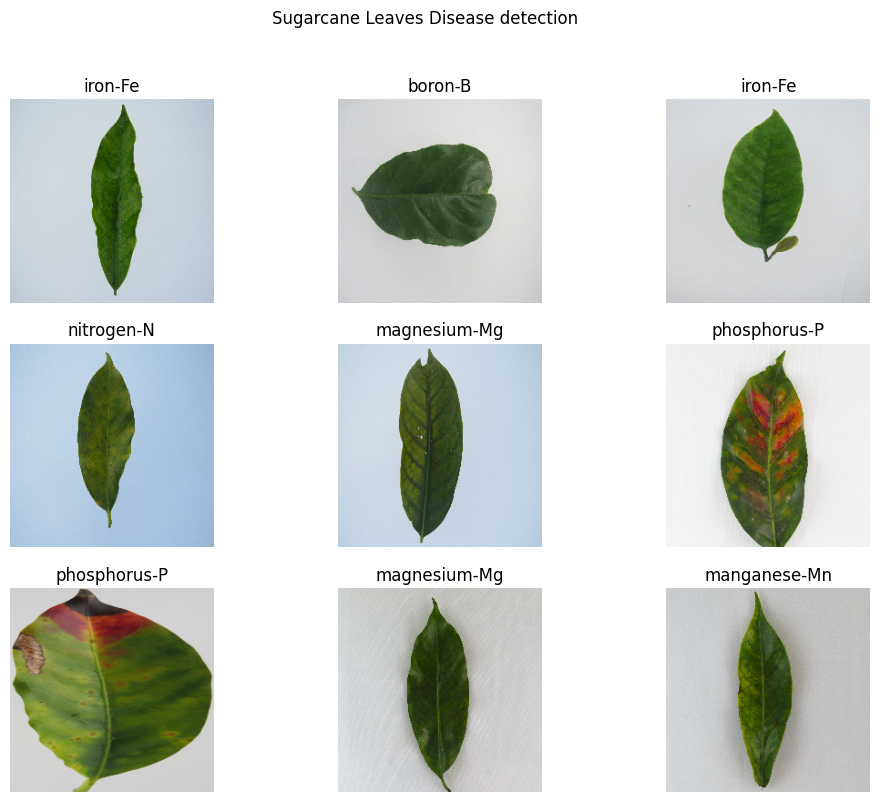

In [4]:
plt.figure(figsize=(12, 9))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(cat[labels[i]])
        plt.suptitle("Sugarcane Leaves Disease detection")
        plt.axis("off")

In [5]:
validation_ds = test.shard(num_shards=2, index=0)
test_ds = test.shard(num_shards=2, index=1)

In [6]:
train_ds = train.cache().shuffle(250).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [7]:
from tensorflow.keras.applications import EfficientNetB0
base_model = EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = True

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
from tensorflow.keras.applications import EfficientNetB0
base_model = EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = True
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(len(cat))
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)



In [9]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=100,
    callbacks=[early_stopping]
)

Epoch 1/100


I0000 00:00:1716222363.731193     114 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


21/21 ━━━━━━━━━━━━━━━━━━━━ 184s 3s/step - accuracy: 0.3627 - loss: 1.8485 - val_accuracy: 0.0833 - val_loss: 2.4327
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.7050 - loss: 0.8539 - val_accuracy: 0.1083 - val_loss: 2.6267
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.7832 - loss: 0.5932 - val_accuracy: 0.1083 - val_loss: 2.8464
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.8733 - loss: 0.4491 - val_accuracy: 0.0000e+00 - val_loss: 2.7252
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.9036 - loss: 0.2935 - val_accuracy: 0.0000e+00 - val_loss: 2.5943
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.9187 - loss: 0.2164 - val_accuracy: 0.0000e+00 - val_loss: 2.6630
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.9436 - loss: 0.1475 - val_accuracy: 0.0000e+00 - val_loss: 2.9652
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.9582 - loss: 0.1364 - val_a

In [10]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds)

# Calculate F1-score
from sklearn.metrics import f1_score

# Predict the labels for the test dataset
y_pred = model.predict(test_ds)
# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Extract true labels from the test dataset
y_true = np.concatenate([y for _, y in test_ds], axis=0)

# Calculate F1-score
test_f1_score = f1_score(y_true, y_pred_labels, average='weighted')

# Display the evaluation results
print(f'Test Loss: {test_loss:.5f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test F1-score: {test_f1_score * 100:.2f}%')

3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.0745 - loss: 2.4064
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step
Test Loss: 2.40875
Test Accuracy: 7.41%
Test F1-score: 1.02%


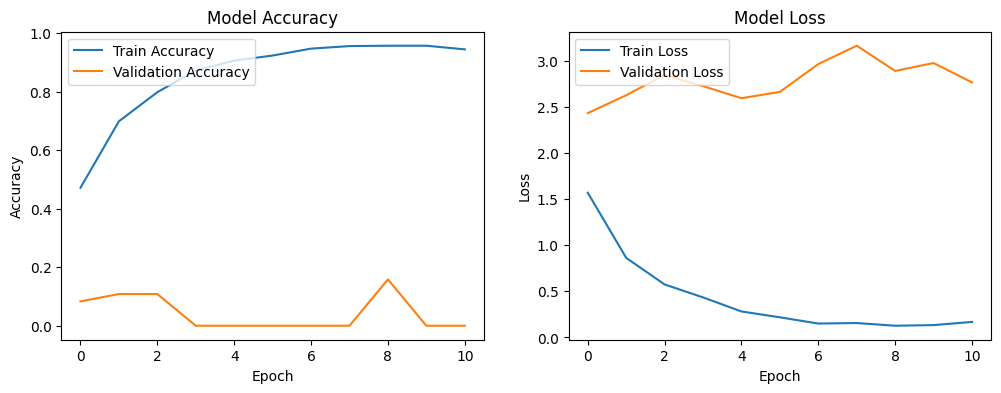

In [11]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.show()

# Call the function to plot
plot_training_history(history)

In [32]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras




In [33]:
cat = train.class_names

# Display sample images
for example_image, example_label in train.take(1):
    break

print(f"Image Shape: {example_image.shape}")


Image Shape: (40, 224, 224, 3)


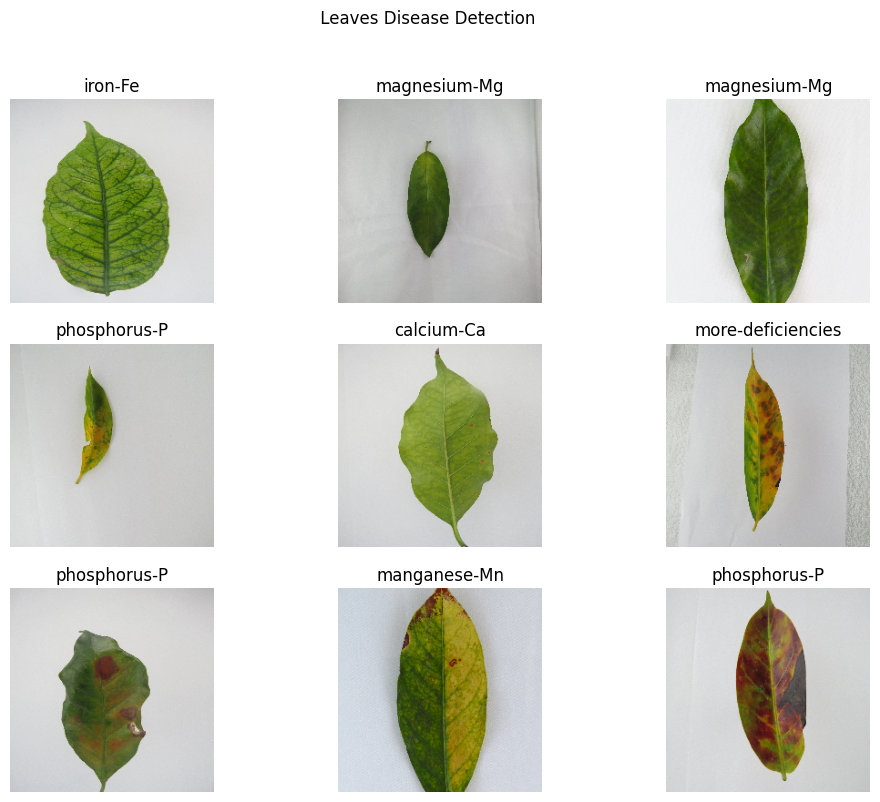

In [34]:

plt.figure(figsize=(12, 9))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(cat[labels[i]])
        plt.suptitle(" Leaves Disease Detection")
        plt.axis("off")


In [35]:
# Set dataset path
dataset = "/kaggle/input/coleaf/CoLeaf DATASET"

# Load categories
categories = os.listdir(dataset)

# Load training and validation datasets
train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset,
    labels="inferred",
    batch_size=40,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="training"
)

test = tf.keras.preprocessing.image_dataset_from_directory(
    dataset,
    labels="inferred",
    batch_size=40,
    image_size=(224, 224),
    seed=42,
    validation_split=0.2,
    subset="validation"
)


Found 1006 files belonging to 10 classes.
Using 805 files for training.
Found 1006 files belonging to 10 classes.
Using 201 files for validation.


In [36]:
# Prepare datasets
validation_ds = test.shard(num_shards=2, index=0)
test_ds = test.shard(num_shards=2, index=1)

train_ds = train.cache().shuffle(250).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


In [37]:


# Load ResNet50 model
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = True

# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(len(cat))
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=100,
    callbacks=[early_stopping]
)


Epoch 1/100
 1/21 ━━━━━━━━━━━━━━━━━━━━ 25:17 76s/step - accuracy: 0.1500 - loss: 2.3488

W0000 00:00:1716227628.824318     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3577 - loss: 1.9282

W0000 00:00:1716227661.804439     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


21/21 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.3598 - loss: 1.9208 - val_accuracy: 0.3000 - val_loss: 127.1915
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - accuracy: 0.4605 - loss: 1.5847 - val_accuracy: 0.1250 - val_loss: 8.7374
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 189ms/step - accuracy: 0.5720 - loss: 1.2631 - val_accuracy: 0.1083 - val_loss: 2.3684
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - accuracy: 0.6244 - loss: 1.0771 - val_accuracy: 0.0833 - val_loss: 7.1946
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - accuracy: 0.6548 - loss: 0.9289 - val_accuracy: 0.1083 - val_loss: 2.3122
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - accuracy: 0.7763 - loss: 0.6814 - val_accuracy: 0.1083 - val_loss: 2.3386
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - accuracy: 0.7831 - loss: 0.6480 - val_accuracy: 0.1083 - val_loss: 2.3274
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - accuracy: 0.8423 - loss: 0.4962 - val_accuracy: 0.016

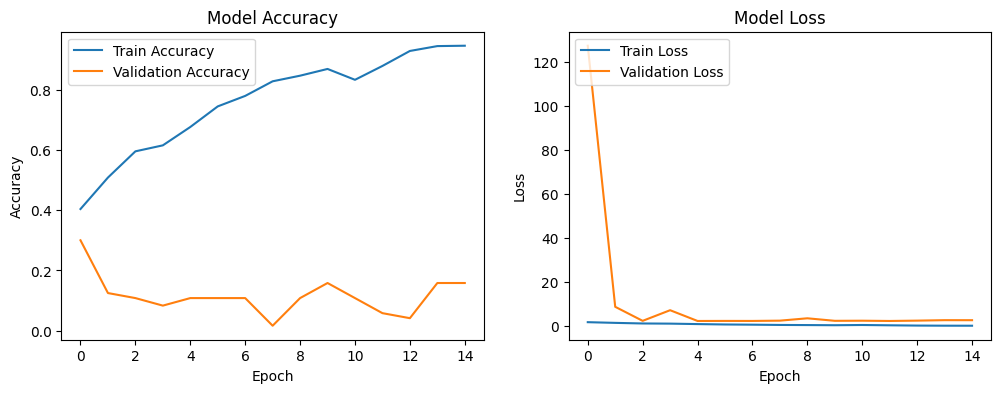

In [39]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.show()

# Call the function to plot
plot_training_history(history)